# Student's t-distribution

通常也简称为T-Distribution。

估计刚接触到这个分布的人都会觉得有点困惑，这个分布跟“学生”有啥子关系呢嘛？答案是没关系。Student在这里不是学生的意思，而是一个人名。这是英国统计学家William Sealy Gosset在发表与此分布相关工作时所用的笔名。所以中文世界中有些人翻译成“学生T分布”是不是有一丢丢类似于“标题党”的意思？按照通常的翻译标准或许翻译成“斯图登特T分布”是不是更合适，当然直接就叫“T分布”是一点没毛病的。

The probability density function for t is:

where 
 is a real number and the degrees of freedom parameter 
 (denoted df in the implementation) satisfies 
. 
 is the gamma function (scipy.special.gamma).

The probability density above is defined in the “standardized” form. To shift and/or scale the distribution use the loc and scale parameters. Specifically, t.pdf(x, df, loc, scale) is identically equivalent to t.pdf(y, df) / scale with y = (x - loc) / scale. Note that shifting the location of a distribution does not make it a “noncentral” distribution; noncentral generalizations of some distributions are available in separate classes.

In [10]:
import random
import numpy as np
from scipy.stats import t
%matplotlib inline
from matplotlib import pyplot as plt

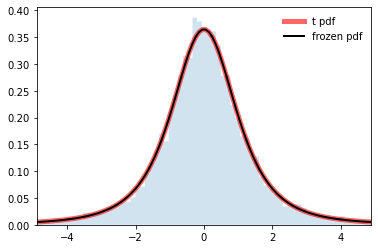

In [17]:
df = 2.74
fig, ax = plt.subplots(1, 1)
x = np.linspace(t.ppf(0.01, df),
                t.ppf(0.99, df), 100)
ax.plot(x, t.pdf(x, df),
       'r-', lw=5, alpha=0.6, label='t pdf')

# Alternatively, the distribution object can be called (as a function) to fix the shape, location and scale parameters. This returns a “frozen” RV object holding the given parameters fixed.
# Freeze the distribution and display the frozen pdf:

rv = t(df)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

# Generate random numbers:
r = t.rvs(df, size=10000)

ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

## DIY implementation



In [5]:
def gamma_function(n):
    cal = 1
    for i in range(2, n):
        cal *= i
    return cal

In [6]:
def student_t(x, freedom, n):

    # divide [x.min(), x.max()] by n
    x = np.linspace(x.min(), x.max(), n)

    c = gamma_function((freedom + 1) // 2) \
        / np.sqrt(freedom * np.pi) * gamma_function(freedom // 2)
    y = c * (1 + x**2 / freedom) ** (-((freedom + 1) / 2))

    return x, y, np.mean(y), np.std(y)

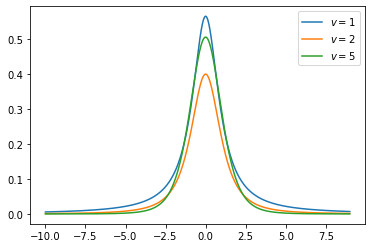

In [8]:
for freedom in [1, 2, 5]:

    x = np.arange(-10, 10) # define range of x
    x, y, _, _ = student_t(x, freedom=freedom, n=10000)
    plt.plot(x, y, label=r'$v=%d$' % (freedom))

plt.legend()
plt.savefig('graph/student_t.png')
plt.show()